In [1]:
## headers
import numpy as np
import ROOT as rt
import root_numpy 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Welcome to JupyROOT 6.18/00


In [2]:
data = rt.TFile("data.root","READ");

In [3]:
tree=data.t

In [4]:
tree.GetEntry(6)

17075208

In [5]:
tree.Show()

======> EVENT:6
 NChannel        = 1280
 NTicks          = 2133760
 tRecoWaveform_Channel = 16, 
                  17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 
                  27, 28, 29, 30, 31, 32, 33, 34, 35
 tRecoWaveform_Tick = 0, 
                  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                  11, 12, 13, 14, 15, 16, 17, 18, 19
 tRecoWaveform_ADC = 1, 
                  0, 1, 1, 0, 0, 
                  0, 1, 1, 2, 1, 
                  2, 1, 1, 1, 1, 
                  0, 1, -1, 1


In [6]:
## Here is a way to access to some data, this does not work well
tree.GetEntry(6);
Channel=np.array(tree.tRecoWaveform_Channel);
Tick=np.array(tree.tRecoWaveform_Tick);
ADC=np.array(tree.tRecoWaveform_ADC);
print(ADC.shape)

(8535040,)


In [7]:
## However, we can make use of the function tree2array to convert a tree into  a numpy array
nptree=root_numpy.tree2array(tree)

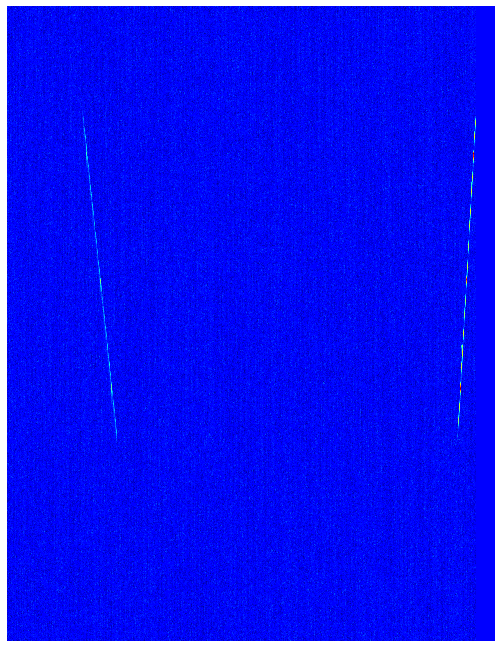

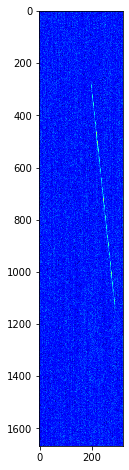

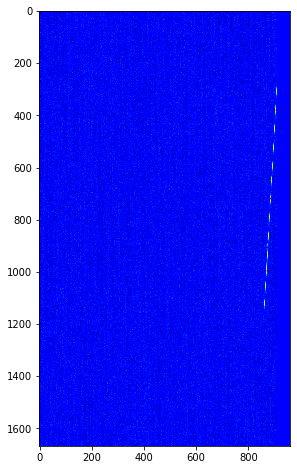

In [17]:
NEvents=tree.GetEntries()
event=int(8)
ADC6=nptree[event][4]
im=ADC6/(np.amax(ADC6))*256 ## convert the adc counts to an image
w , h = int(nptree[6][0]) , int(nptree[6][1]/nptree[6][0])
im=im.reshape((w,h))
im1=im[0:(319),:]
im2=im[(319):,:]
columns=int(2)
rows=int(1)
zoom=im[100:400,200:1200]

fig = plt.figure(frameon = False)
plt.imshow(im.T,cmap = 'jet',interpolation='none') ##grey scale
plt.axis('off') ## no axis
fig.set_size_inches(12.8, 11.67)
plt.savefig("fig1.png")
plt.show()


figzoom = plt.figure(figsize=(8,8))
plt.imshow(im1.T,cmap = 'jet',interpolation='none') ##grey scale
plt.show()

figzoom = plt.figure(figsize=(8,8))
plt.imshow(im2.T,cmap = 'jet',interpolation='none') ##grey scale
plt.show()

In [9]:
im.shape ##this is the current resolution, but this value can be reduced 
1667/20

83.35

# Things to do
* Señal mas significativa 
* Reducir el tamaño de la imagen (sin reducir la señales)
* Ganar intuicion: Plot de $e^{-}$, $\mu$, $p$,... 
* controlar dpi (puntos por pulgada), 
* Trabajar plot en Python. Size del fichero de 10 000 imagenes


# 1. The significance of the signal 
It is determined by the simulations, therefore, we do not have control over it

# 2 . the resolution of the images can be reduced as desired
We will save the images as ".png" images and the they will be fed into the CNN. In order to do so, the following  function may be useful `plt.savefig(figname,dpi=dots per inch)`. However, several factors need to be taken into account: 


In [40]:
np.savetxt("im.csv", im, delimiter=",")

In [41]:
im.shape

(1280, 1667)

In [42]:
imopen = np.genfromtxt("im.csv", delimiter=',')

In [18]:
plt.imshow(imopen.T,cmap = 'jet',interpolation='none') ##grey scale

NameError: name 'imopen' is not defined

<Figure size 432x288 with 0 Axes>

In [49]:
fig = plt.figure(frameon = False)
plt.imshow(im.T,cmap = 'jet',interpolation='none') ##grey scale
plt.axis('off') ## no axis
fig.set_size_inches(12.8, 11.67)
plt.savefig("fig1.png")
plt.show()

960.0